In [269]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [270]:
data = pd.read_csv('dataset.csv',header = None)
data_classes = ['R','M']
d = {'R':-1,'M':+1}
data[60] = data[60].map(d, na_action='ignore')
data = data.sample(frac=1)

In [271]:
train, validate, test = np.split(data, [int(.7*len(data)), int(.8*len(data))])

In [272]:
class AdalineGD(object):
    def __init__(self, eta = 0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self,X, y,X_val,y_val):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        self.valcost_ = [] 
        for i in range(self.n_iter):
            output = self.net_input(X)
            val_output = self.net_input(X_val)
            errors = (y - output)
            val_errors = (y_val - val_output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / (2.0*X.shape[0])
            val_cost = (val_errors ** 2).sum() / (2.0*X_val.shape[0])
            self.cost_.append(cost)
            self.valcost_.append(val_cost)
        return self.cost_,self.valcost_

    def net_input(self, X):
        """ Calculate net input """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """ Compute linear activation """
        return self.net_input(X)
    
    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(X) >= 0.0, +1,-1)

In [273]:
X_train = train.drop(60, axis=1).to_numpy()
y_train = train[60].to_numpy()
X_validate = validate.drop(60, axis=1).to_numpy()
y_validate = validate[60].to_numpy()
model1 = AdalineGD(n_iter =400 , eta = 0.001)
train_cost,validation_cost = model1.fit(X_train, y_train,X_validate,y_validate)

Text(0, 0.5, 'MSE')

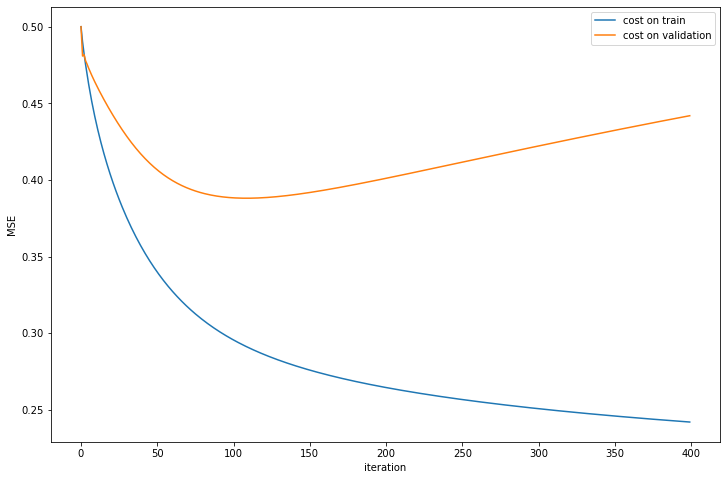

In [274]:
fig = plt.figure()
fig.set_size_inches(12,8)
ax = fig.add_subplot(1,1,1)
ax.plot(train_cost,label='cost on train')
ax.plot(validation_cost,label='cost on validation')
ax.legend()
ax.set_xlabel('iteration')
ax.set_ylabel('MSE')

In [275]:
X_test = test.drop(60, axis=1).to_numpy()
y_test = test[60].to_numpy()

y_pred =model1.predict(X_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

accuracy(y_test,y_pred)

0.7857142857142857

In [276]:
def confusion_df(grand_truth, predicts):
    df = pd.DataFrame({'predict': predicts, 'actual': grand_truth, 'cnt': 1})
    return pd.crosstab(df.actual, df.predict)
confusion_df(y_test,y_pred)


predict,-1,1
actual,,
-1,12,7
1,2,21


In [266]:
acc_list = []
for i in range(30):
    data = pd.read_csv('dataset.csv',header = None)
    data_classes = ['R','M']
    d = {'R':-1,'M':1}
    data[60] = data[60].map(d, na_action='ignore')
    data = data.sample(frac=1)
    train, validate, test = np.split(data, [int(.7*len(data)), int(.8*len(data))])
    X_train = train.drop(60, axis=1).to_numpy()
    y_train = train[60].to_numpy()
    X_validate = validate.drop(60, axis=1).to_numpy()
    y_validate = validate[60].to_numpy()
    X_test = test.drop(60, axis=1).to_numpy()
    y_test = test[60].to_numpy()
    model1 = AdalineGD(n_iter =150 , eta = 0.001)
    train_cost,validation_cost = model1.fit(X_train, y_train,X_validate,y_validate)
    y_pred = model1.predict(X_test)
    acc_list.append(accuracy(y_test,y_pred))
    i+=1
print(np.mean(acc_list))

0.7555555555555556
